## National analysis : evolution of GJ mobilization online, offline compared to the activity bonus


Preprocessing of databases : 
- Insee census population (to adjust vaother database variables)
- Prime d'activite total amounts over time
- Offline protests by ministere and Gilets jaunes
- Online mobilization on Facebook 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import openpyxl

In [2]:
path = "/Users/clem/Documents/Memoire"

In [3]:
# Insee population
pop_month = pd.read_csv(path + '/Data/Sources/INSEE/Pop-nat-mensuelle.csv', sep=';')
pop_month = pop_month.iloc[3:,:]
pop_month.rename(columns={'Libellé': 'date','Démographie - Population au début du mois - France métropolitaine' : 'pop' }, inplace=True)
pop_month['date'] = pop_month['date'].astype(str)
pop_month['month'] = pop_month['date'].str[:7]
pop_month = pop_month[['month', 'pop']]

# Prime d'activite
PA_TS = pd.read_stata(path + "/Data/Stata/agg_table_regall_by_date.dta")
amounts_PA_TS = PA_TS.loc[:,['mtppaver', 'date']]
amounts_PA_TS['date'] = amounts_PA_TS['date'].astype(str)
amounts_PA_TS['month'] = amounts_PA_TS['date'].str[:7]
amounts_PA_TS = pd.merge(amounts_PA_TS, pop_month, how = 'inner', on = 'month')
amounts_PA_TS['pop'] = amounts_PA_TS['pop'].astype(int)
amounts_PA_TS['m_mtppaver_pop'] = amounts_PA_TS['mtppaver']/(amounts_PA_TS['pop']*1000)
amounts_PA_TS['date'] = pd.to_datetime(amounts_PA_TS['date'])
amounts_PA_TS = amounts_PA_TS.iloc[17:32,:]

# Offline protests 
# by ministere
manifestants = pd.read_csv(path +'/Data/Mobilization/decomptes_ministere.csv', sep=";")
manifestants['date'] = pd.to_datetime(manifestants['date'])
manifestants = manifestants.sort_values('date')
manifestants = manifestants.iloc[1:29,:]
# by Nombre Jaune
nombrejaune_dep = pd.read_excel(path + '/Data/Mobilization/Mobilisation_par_departement.xlsx')
nombrejaune_dep['date'] = pd.to_datetime(nombrejaune_dep['date'])
nombrejaune = nombrejaune_dep.groupby('date').sum()
nombrejaune = nombrejaune.sort_values('date')
nombrejaune = nombrejaune.iloc[:18,:]

# Online mobilization
mobilization_TS = pd.read_csv(path + "/Data/Facebook/stats_per_day.csv", sep = ';')
mobilization_TS['date'] = pd.to_datetime(mobilization_TS['date'])
mobilization_TS = mobilization_TS.sort_values('date')
mobilization_TS['total'] = mobilization_TS['posts'] + mobilization_TS['comments'] + mobilization_TS['reactions'] 
+ mobilization_TS['shares']

/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34145/1340573456.py:23: UserWarning: Parsing '17/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  manifestants['date'] = pd.to_datetime(manifestants['date'])
/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34145/1340573456.py:23: UserWarning: Parsing '24/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  manifestants['date'] = pd.to_datetime(manifestants['date'])
/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34145/1340573456.py:23: UserWarning: Parsing '15/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  manifestants['date'] = pd.to_datetime(manifestants['date'])
/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34145/1340573456.py:23: UserWarning: Parsing '22/12/2018' in DD/MM/YYYY format. Provide format or specify i

196     0
197     0
198     0
199     0
200     0
       ..
191     1
192    46
193     4
194    22
195     4
Name: shares, Length: 225, dtype: int64

Graphs: 

1. Prime d'activité and Protests

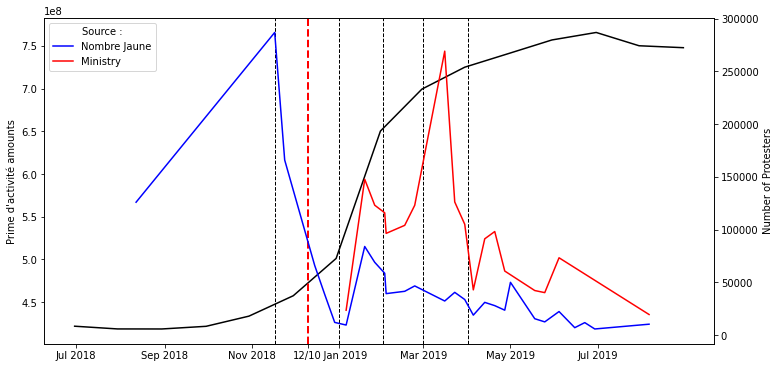

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable on the left axis
ax1.plot(amounts_PA_TS['date'], amounts_PA_TS['mtppaver'], color ='black')
#plt.vlines(x=, ymin=0, ymax=250, colors='green', ls=':', lw=2)
ax1.set_ylabel("Prime d'activité amounts", color='black')
#ax1.tick_params(axis='y', labelcolor='black')

# Set the x-axis tick positions
xticks = ['2018-07-01', '2018-09-01', '2018-11-01','2018-12-10', '2019-01-01', '2019-03-01', '2019-05-01','2019-07-01']
ax1.set_xticks(xticks)

# Set the x-axis tick labels
xticklabels = ["Jul 2018", "Sep 2018", "Nov 2018", "12/10", "    Jan 2019", "Mar 2019", "May 2019", "Jul 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-04-01'), color='black', linestyle='--', lw=1)
ax2 = ax1.twinx()

# Plot the second variable on the right axis
line1 = ax2.plot(manifestants['date'], manifestants['nombre'], color='blue', label='Nombre Jaune')
line2 = ax2.plot(nombrejaune.index, nombrejaune['nombre'], color='red', label= 'Ministry')
ax2.set_ylabel('Number of Protesters')
#ax2.tick_params(axis='y', labelcolor='black')

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax2.legend(loc='upper left', title='Source :')

plt.savefig(path + '/Output/Graphs/PA_protests.png')



2. Prime d'activité and Facebook reactions

a. Prime d'activité and Facebook posts and comments

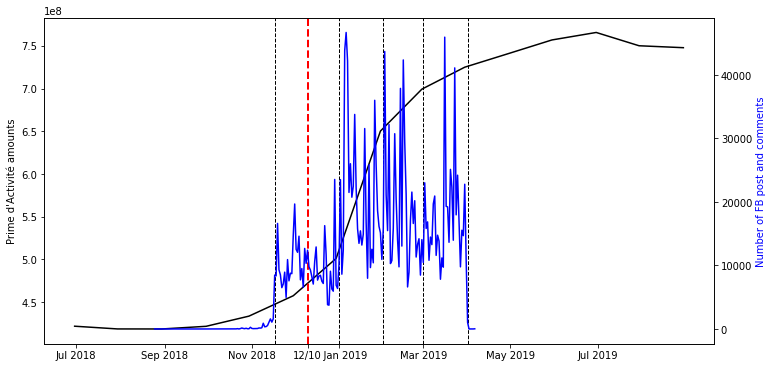

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable on the left axis
ax1.plot(amounts_PA_TS['date'], amounts_PA_TS['mtppaver'], color ='black')
#plt.vlines(x=, ymin=0, ymax=250, colors='green', ls=':', lw=2)
ax1.set_ylabel("Prime d'Activité amounts", color='black')
#ax1.tick_params(axis='y', labelcolor='black')

# Set the x-axis tick positions
xticks = ['2018-07-01', '2018-09-01', '2018-11-01','2018-12-10', '2019-01-01', '2019-03-01', '2019-05-01','2019-07-01']
ax1.set_xticks(xticks)

# Set the x-axis tick labels
xticklabels = ["Jul 2018", "Sep 2018", "Nov 2018", "12/10", "    Jan 2019", "Mar 2019", "May 2019", "Jul 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-04-01'), color='black', linestyle='--', lw=1)
ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(mobilization_TS['date'], mobilization_TS['comments']+ mobilization_TS['posts'], color='blue')
ax2.set_ylabel('Number of FB post and comments', color='blue')
#ax2.tick_params(axis='y', labelcolor='black')

plt.savefig(path + '/Output/Graphs/PA_FBcom.png')


b. Prime d'activité and Facebook posts and comments aggregated per month

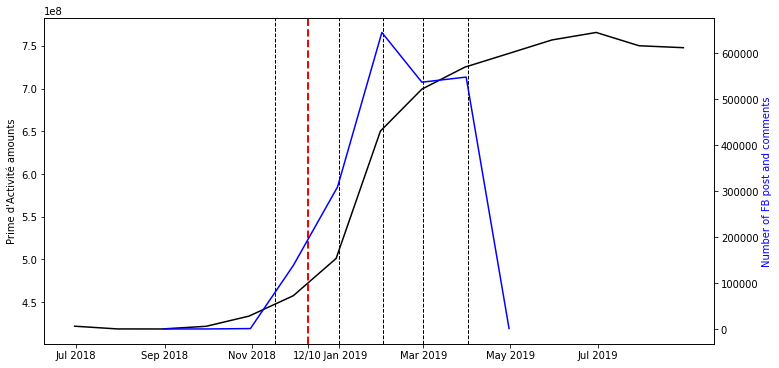

In [17]:
# Aggregate per month for less noisy signal + s'aligner avec fréqeuce données PA
monthly_data = mobilization_TS.groupby(pd.Grouper(key='date', freq='M')).sum()


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable on the left axis
ax1.plot(amounts_PA_TS['date'], amounts_PA_TS['mtppaver'], color ='black')
#plt.vlines(x=, ymin=0, ymax=250, colors='green', ls=':', lw=2)
ax1.set_ylabel("Prime d'Activité amounts", color='black')
#ax1.tick_params(axis='y', labelcolor='black')


# Set the x-axis tick positions
xticks = ['2018-07-01', '2018-09-01', '2018-11-01','2018-12-10', '2019-01-01', '2019-03-01', '2019-05-01','2019-07-01']
ax1.set_xticks(xticks)

# Set the x-axis tick labels
xticklabels = ["Jul 2018", "Sep 2018", "Nov 2018", "12/10", "    Jan 2019", "Mar 2019", "May 2019", "Jul 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-04-01'), color='black', linestyle='--', lw=1)
ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(monthly_data.index, monthly_data['comments'] + monthly_data['posts'], color='blue')
ax2.set_ylabel('Number of FB post and comments', color='blue')
#ax2.tick_params(axis='y', labelcolor='black')

plt.savefig(path + '/Output/Graphs/PA_FBcom_monthlevel.png')



c. Prime d'activité and Facebook total reactions 

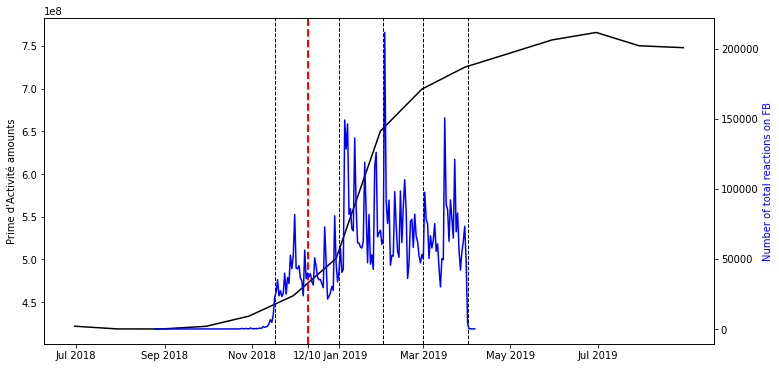

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable on the left axis
ax1.plot(amounts_PA_TS['date'], amounts_PA_TS['mtppaver'], color ='black')
#plt.vlines(x=, ymin=0, ymax=250, colors='green', ls=':', lw=2)
ax1.set_ylabel("Prime d'Activité amounts", color='black')
#ax1.tick_params(axis='y', labelcolor='black')

# Set the x-axis tick positions
xticks = ['2018-07-01', '2018-09-01', '2018-11-01','2018-12-10', '2019-01-01', '2019-03-01', '2019-05-01','2019-07-01']
ax1.set_xticks(xticks)

# Set the x-axis tick labels
xticklabels = ["Jul 2018", "Sep 2018", "Nov 2018", "12/10", "    Jan 2019", "Mar 2019", "May 2019", "Jul 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-04-01'), color='black', linestyle='--', lw=1)
ax2 = ax1.twinx()


# Plot the second variable on the right axis
ax2.plot(mobilization_TS['date'], mobilization_TS['total'], color='blue')
ax2.set_ylabel('Number of total reactions on FB', color='blue')
#ax2.tick_params(axis='y', labelcolor='black')


plt.savefig(path + '/Output/Graphs/PA_FBreacts.png')


d. Prime d'activité and Facebook total reactions aggregated per month

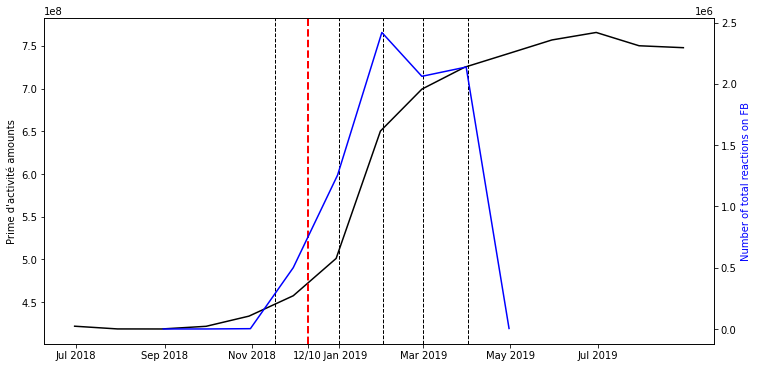

In [24]:
# Aggregate per month for less noisy signal + s'aligner avec fréquence données PA

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable on the left axis
ax1.plot(amounts_PA_TS['date'], amounts_PA_TS['mtppaver'], color ='black')
#plt.vlines(x=, ymin=0, ymax=250, colors='green', ls=':', lw=2)
ax1.set_ylabel("Prime d'activité amounts", color='black')
#ax1.tick_params(axis='y', labelcolor='black')

# Set the x-axis tick positions
xticks = ['2018-07-01', '2018-09-01', '2018-11-01','2018-12-10', '2019-01-01', '2019-03-01', '2019-05-01','2019-07-01']
ax1.set_xticks(xticks)

# Set the x-axis tick labels
xticklabels = ["Jul 2018", "Sep 2018", "Nov 2018", "12/10", "    Jan 2019", "Mar 2019", "May 2019", "Jul 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-04-01'), color='black', linestyle='--', lw=1)
ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(monthly_data.index, monthly_data['total'], color='blue')
ax2.set_ylabel('Number of total reactions on FB', color='blue')
#ax2.tick_params(axis='y', labelcolor='black')

plt.savefig(path + '/Output/Graphs/PA_FBreacts_monthlevel.png')

